In [208]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt 
import sys
import time
from functools import reduce
import math
from numpy import inf
from ggplot import *

In [209]:
df1 = pd.read_excel('FunctionalAnnotationChartScore0.xlsx')
df2 = pd.read_excel('FunctionalAnnotationChartScore0_10.xlsx')
df3 = pd.read_excel('FunctionalAnnotationChartScore10_20.xlsx')
df4 = pd.read_excel('FunctionalAnnotationChartScore20_.xlsx')

In [210]:
data1=pd.DataFrame()
data1['Term']=df1['Term']
data1['PValue1']=df1['PValue']

In [211]:
data2=pd.DataFrame()
data2['Term']=df2['Term']
data2['PValue2']=df2['PValue']

In [212]:
data3=pd.DataFrame()
data3['Term']=df3['Term']
data3['PValue3']=df3['PValue']

In [213]:
data4=pd.DataFrame()
data4['Term']=df4['Term']
data4['PValue4']=df4['PValue']

In [215]:
newdata=pd.merge(data1, data2, on='Term',how="right")
newdata=pd.merge(data3,newdata, on='Term', how='right')
newdata=pd.merge(data4,newdata, on='Term', how='right')
newdata=newdata.fillna(0)

In [220]:
newdata['PValue1']=-np.log10(newdata['PValue1'])
newdata['PValue2']=-np.log10(newdata['PValue2'])
newdata['PValue3']=-np.log10(newdata['PValue3'])
newdata['PValue4']=-np.log10(newdata['PValue4'])

newdata['PValue1'].replace(np.inf, 0, inplace=True)
newdata['PValue2'].replace(np.inf, 0, inplace=True)
newdata['PValue3'].replace(np.inf, 0, inplace=True)
newdata['PValue4'].replace(np.inf, 0, inplace=True)

C:\Users\Amritpal Singh\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


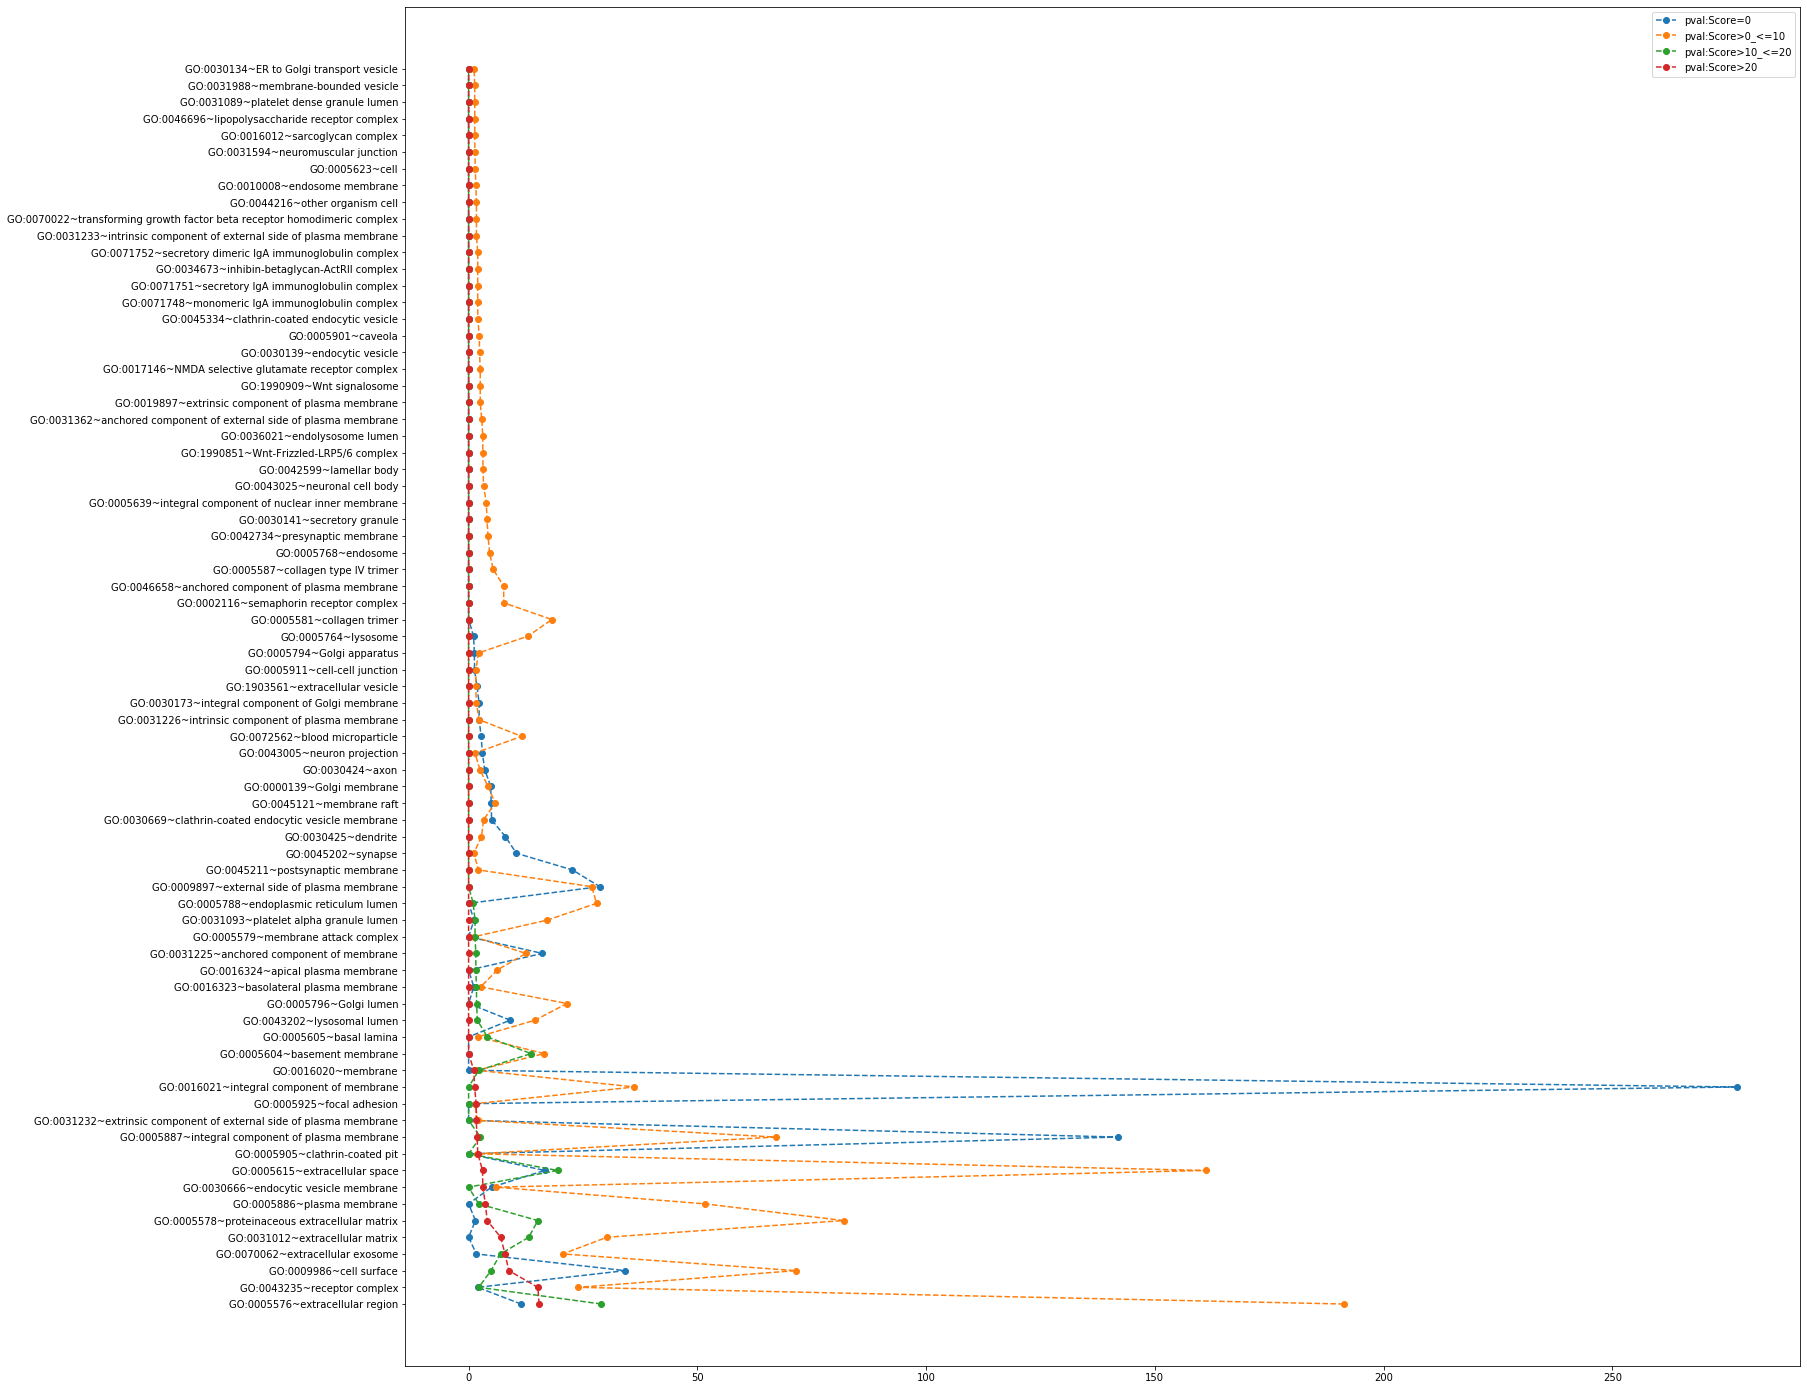

In [296]:
plt.figure(figsize=(25,25))
plt.plot( newdata['PValue1'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue2'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue3'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue4'],newdata['Term'], linestyle='--', marker='o')

labels=['pval:Score=0','pval:Score>0_<=10','pval:Score>10_<=20','pval:Score>20']
plt.legend(labels)
plt.savefig('new.jpg')